# **Série de Travaux Pratiques N° 4 : Regréssion Multiple et Regréssion Polynomiale**

# **Partie I : Regréssion multiple**

- La régression multiple est comme la régression linéaire, mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

- L’ensemble de données ci-dessous contient des informations sur les voitures.
- Nous pouvons prédire les émissions de CO2 d’une voiture en fonction de la taille du moteur, mais avec la régression multiple, nous pouvons intégrer davantage de variables, comme le poids de la voiture, pour rendre la prédiction plus précise.

### **Question 1**

1)- Lisez le fichier "data.csv"renvoyez un objet DataFrame et afficher le dataset avec head()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cars_dataset= pd.read_csv('data.csv')
cars_dataset.info()
cars_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### **Question 2**

2)- Faites ensuite une dataframe des valeurs indépendantes (Volume et Wheight) et appelez cette variable X.

In [3]:
X = cars_dataset[['Volume', 'Weight']] #x=cars_dataset.iloc[:,2:-1].values
X.head()

,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140


### **Question 3**

3)- Mettez les valeurs dépendantes (CO2) dans une variable appelée y.






In [4]:
y = cars_dataset[['CO2']] # cars   [:,:-1]
y.head()

,CO2
0,99
1,95
2,95
3,90
4,105


### **Question 4**

4)- À partir du module sklearn, utlisez la méthode LinearRegression() pour créer un objet de régression linéaire.

In [5]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

### **Question 5**

5)- Cet objet possède une méthode appelée fit() qui prend les valeurs indépendantes **X** et dépendantes **y** comme paramètres et remplit l'objet de régression avec des données décrivant la relation :


In [6]:
regression_model.fit(X, y)
regression_model.score(X,y)


0.3765564043619989

### **Question 6**

6)- Nous disposons désormais d'un objet de régression prêt à prédire les valeurs de CO2 en fonction du poids et du volume d'une voiture. On veut prédire combien de grammes de CO2 est dégagés pour chaque kilomètre parcouru pour une voiture équipée d’un moteur de 1,3 litre (1300 ml) et pesant 2300 kg (utiliser la fonction predict).

In [7]:
nouvelles_donnees = [[1300, 2300]]  # Volume: 1300 ml et le Poids: 2300 kg

prediction_CO2 = regression_model.predict(nouvelles_donnees)

print("Prédiction des émissions de CO2 par kilomètre:", prediction_CO2, "grammes")

Prédiction des émissions de CO2 par kilomètre: [[107.2087328]] grammes


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Question 7**

7)- Le coefficient est un facteur qui décrit la relation avec une variable inconnue.

Exemple : si x est une variable, alors 2x vaut x deux fois. x est la variable inconnue et le chiffre 2 est le coefficient.

Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [8]:
coeff = regression_model.coef_[0]

coefficient_poids=coeff[1]
coefficient_volume=coeff[0]

# Coefficient associé au poids
print("Coefficient associé au poids:", coefficient_poids)

# Coefficient associé au volume
print("Coefficient associé au volume:", coefficient_volume)

Coefficient associé au poids: 0.007550947270300682
Coefficient associé au volume: 0.007805257527747128


# **Partie II : Regréssion Polynomiale**

### **Question 1**

1- Importer les librairies : numpy, matplotlib, sklearn.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor

### **Question 2**

2- Créer votre dataset en important la fonction datasets.make_regression et utilisez la pour générer un problème de régression aléatoire de 100 exemples avec une seule variable avec y=x^2

In [10]:
np.random.seed(0)
x,y= make_regression(n_samples=100, n_features=1, noise=6)
y=y**2


In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat =PolynomialFeatures(degree=2, include_bias=False)
x=poly_feat.fit_transform(x)

### **Question 3**

3- Visualiser vos données en utilisant la fonction plt.scatter(x, y).

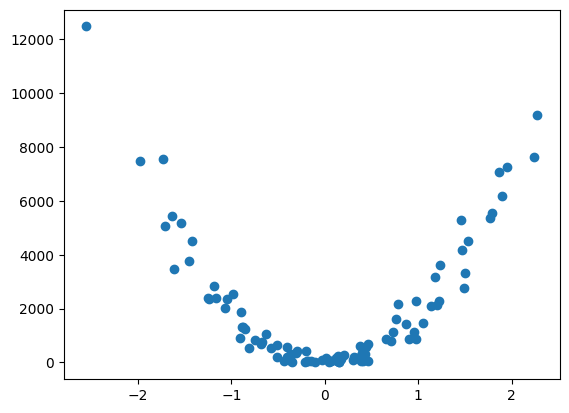

In [12]:
plt.scatter(x[:,0],y)

### **Question 4**

4- Définir votre modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [13]:
model= SGDRegressor(max_iter=100, eta0=0.0001)

### **Question 5**

5- Entraîner votre modèle en utilisant la méthode fit().

In [14]:
model.fit(x,y)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100)

### **Question 6**

6- Calculer la précision de votre modèle en utilisant la fonction score qui calcule le coefficient de détermination entre le modèle et les valeurs y de votre Dataset.

In [15]:
print ("Score du model :", model.score(x,y))

Score du model : 0.27187960893653196


### **Question 7**

7- Faire de nouvelles prédictions avec la fonction predict() et tracer les résultats.

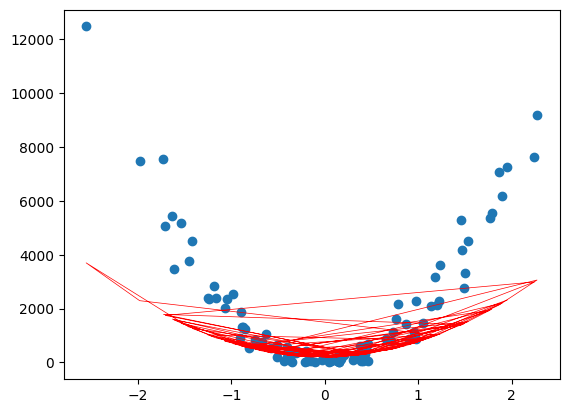

In [16]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],model.predict(x), c='red', lw=.5)

### **Question 8**

8- Refaire le même travail en entraînant votre modèle sur 1000 itérations avec un Learning rate de 0.001.

In [17]:
model2=SGDRegressor(max_iter=1000, eta0=0.001)
model2.fit(x,y)
model2.score(x,y)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9592630376735185

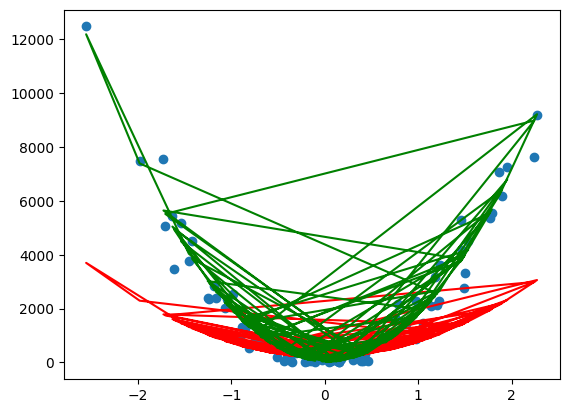

In [19]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],model.predict(x), c='red') #old model 100/0.0001
plt.plot(x[:,0],model2.predict(x), c='green') # new model 1000/0.001